In [1]:
import numpy as np
import matplotlib.pyplot as plt
from libs.utils import EXPERIMENT

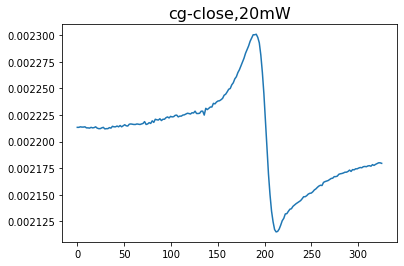

In [2]:
EX = EXPERIMENT('cg',1,'close',20)
EX.plot_power()

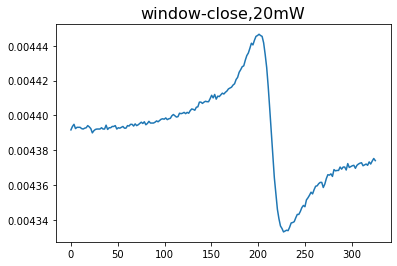

In [3]:
EX = EXPERIMENT('window',2,'close',20)
EX.plot_power()